In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline 

In [23]:
#The data

In [24]:
train = pd.read_csv('titanic_train.csv')

In [26]:
train.describe ()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
#data analysis 

In [31]:
#find missing values

In [32]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


C:\Users\daved\AppData\Local\Temp\ipykernel_8424\4146104318.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),cmap="YlGnBu")


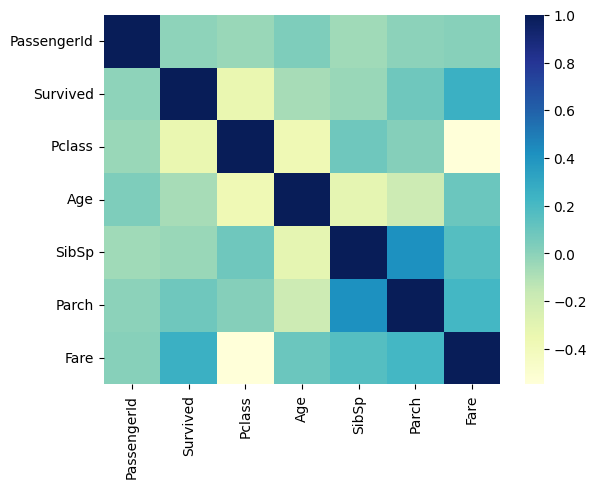

In [34]:
#correlation heatmap for seeing the relation in between the data

import seaborn as sns 

sns.heatmap(train.corr(),cmap="YlGnBu")
plt.show()

<AxesSubplot: >

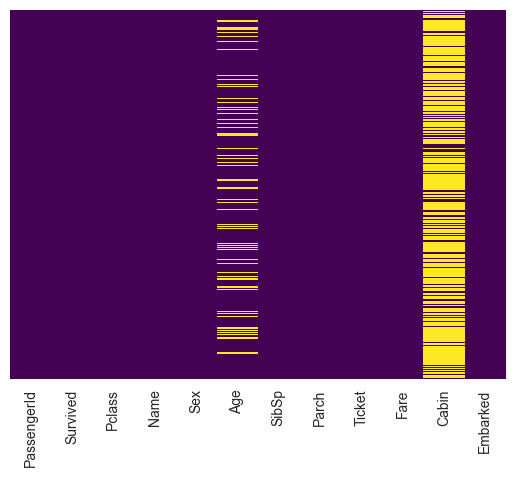

In [40]:
#for seeing the no. of null values in the data

sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot: xlabel='Survived', ylabel='count'>

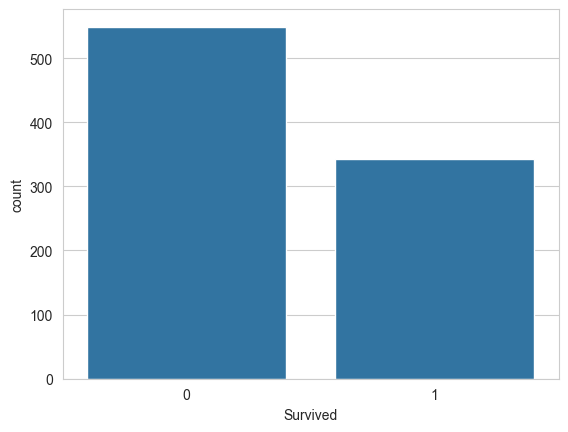

In [53]:
#no. of people survived and not survived
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

<AxesSubplot: xlabel='Survived', ylabel='count'>

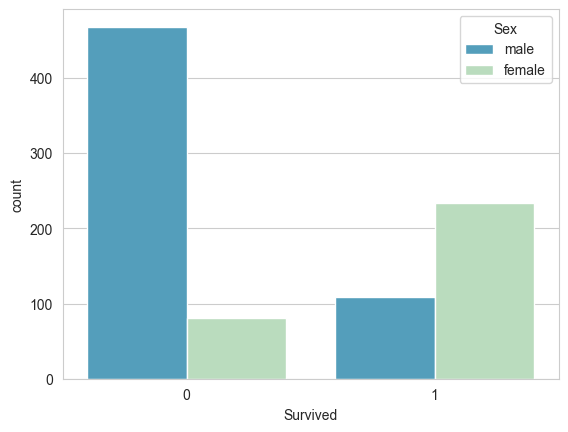

In [56]:
#no. of female and male survived 

sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='GnBu_r')

<AxesSubplot: xlabel='Survived', ylabel='count'>

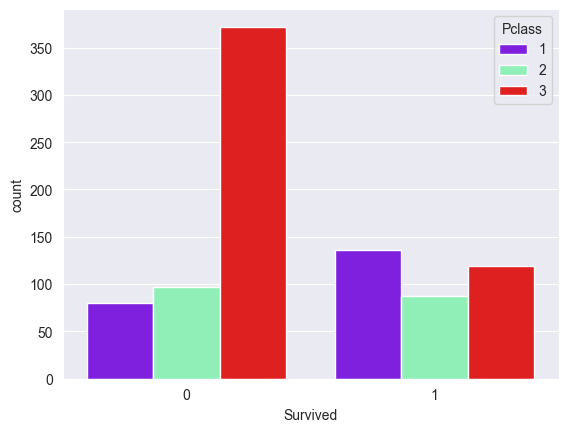

In [61]:
#no. of passenger survived with respect to their passenger class

sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')


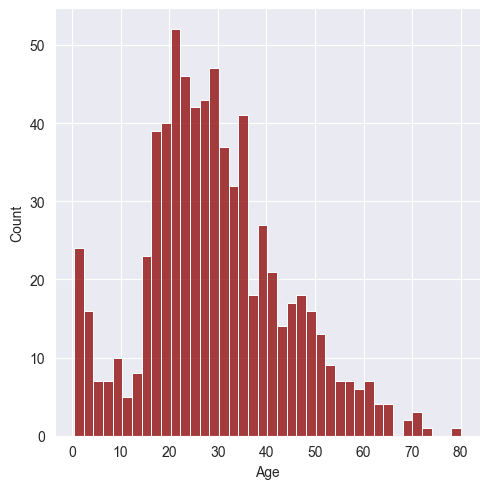

In [68]:
#age range of passangers which were their in the titanic

sns.displot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

<AxesSubplot: xlabel='SibSp', ylabel='count'>

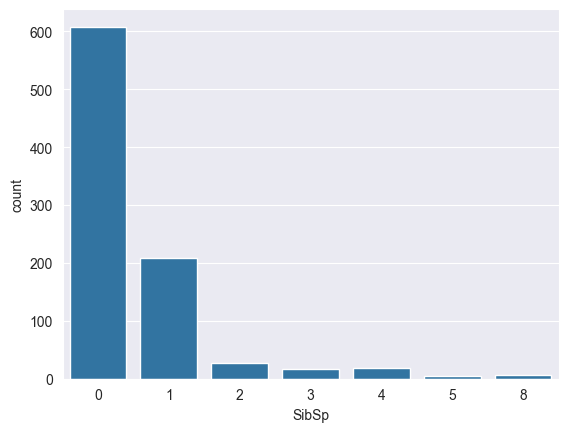

In [72]:
#these gives the count of siblings and spouse

sns.countplot(x='SibSp',data=train)

<AxesSubplot: >

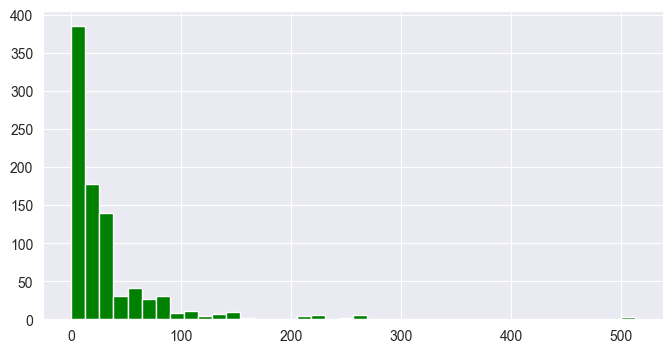

In [73]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [74]:
#data cleaning

C:\Users\daved\AppData\Local\Temp\ipykernel_8424\3651758829.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')


<AxesSubplot: xlabel='Pclass', ylabel='Age'>

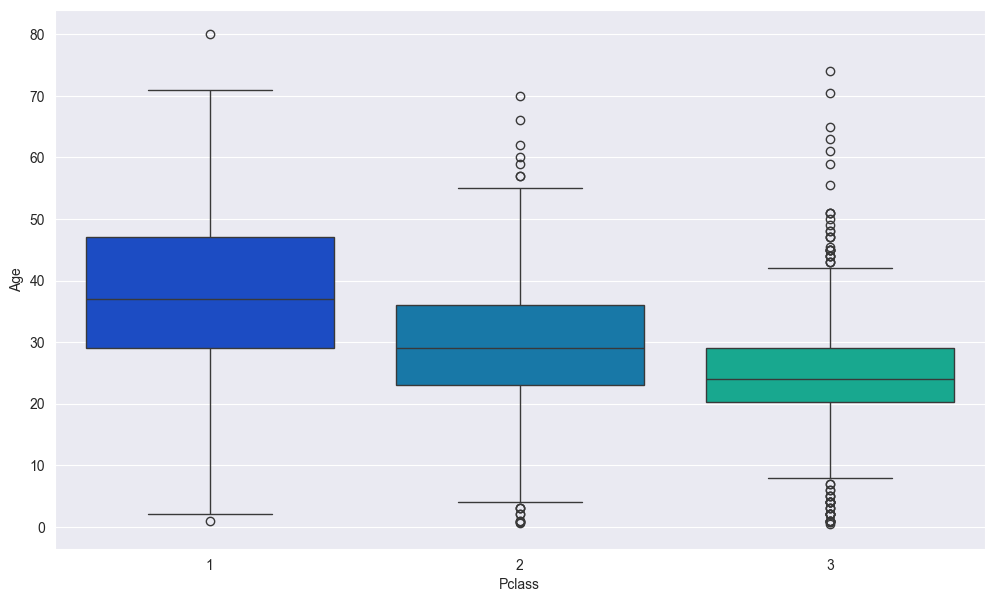

In [136]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')


In [ ]:
#to fill the null values

In [79]:
def impute_age(cols):
    Age =cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
        
    else:
        return Age
    

In [92]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

In [82]:
#now once again lets check the heatmap

<AxesSubplot: >

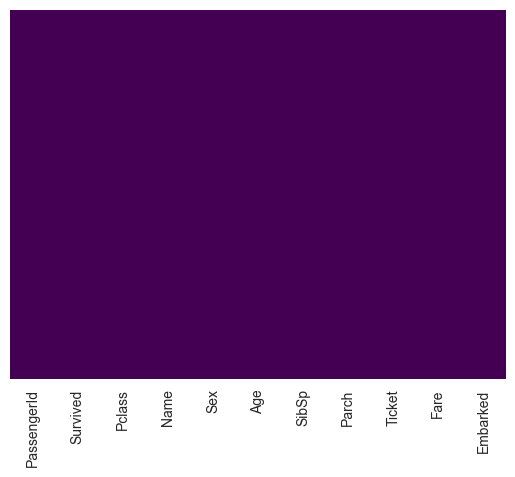

In [95]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [96]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [97]:
train.dropna(inplace=True)

In [98]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [142]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [143]:
train = pd.concat([train,sex,embark],axis=1)

In [144]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1,1,0,1


In [145]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1,1,0,1


In [146]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [2]:
from sklearn.model_selection import train_test_split

In [14]:
from sklearn.linear_model import LogisticRegression


In [15]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

NameError: name 'X_train' is not defined